# Benchmark 1

- Models score when the shuffle param in train_test_split is True.
    - Train set: 80% of the entire dataset
    - Test set: 20% of the entire dataset

### Model seletction results

This plot is about the models score generated with model_selection.py where the hyperparams are adjusted to optimize the results of each model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import std
import seaborn as sns

# Dataset as a dataframe.
df_mae_B1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_results.csv', sep=",")
df_mae_B1 = df_mae_B1[['Name','MAE_test']]

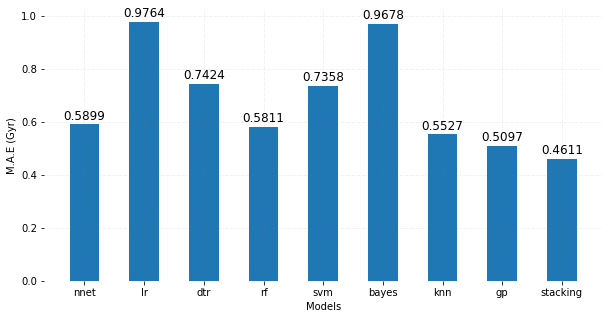

In [2]:
name = df_mae_B1['Name'].tolist()
score = df_mae_B1['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E (Gyr)')
ax.set_xlabel('Models')
  
plt.show()    
#plt.savefig('B1.pdf')

### Final test plots

The next plots shown the execution of final_test.py for each model, where it can be seen the predictions and the error generated.

In [6]:
# Dataset as a dataframe.
df_model_B1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_final_test_stacking.csv', sep=",")
df_model_B1 = df_model_B1[['y_test','y_pred','reg_error','y_std']]

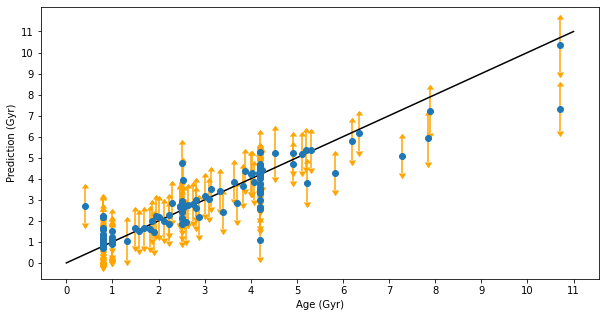

In [7]:
fig, ax = plt.subplots(figsize = (10,5))

ax = plt.errorbar(df_model_B1.y_test, df_model_B1.y_pred, yerr=df_model_B1.y_std, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.plot(range(0,12),range(0,12), color='black')

plt.yticks(np.arange(0, 12, 1))
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Age (Gyr)")
plt.ylabel("Prediction (Gyr)")
plt.show()
#plt.savefig('B1_stacking_1_.pdf')

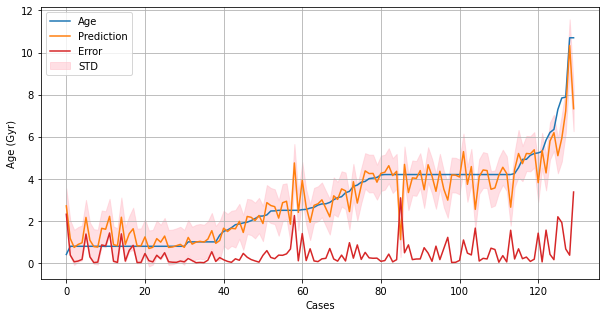

In [8]:
score = df_mae_B1.iloc[8,1]
y_std = df_model_B1.y_std
n = np.arange(df_model_B1['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_model_B1['y_test'], c='tab:blue', label='Age')
ax.plot(n, df_model_B1['y_pred'], c='tab:orange', label='Prediction')
ax.plot(n, abs(df_model_B1['reg_error']), c='tab:red', label='Error')

ax.fill_between(n, df_model_B1['y_pred']-y_std, df_model_B1['y_pred']+y_std,
                color="pink", alpha=0.5, label="STD")
ax.set_xlabel('Cases')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.grid(True)
plt.show()
#plt.savefig('B1_stacking_2.pdf')

### Ages histogram (train and test)

In [9]:
# Train and test datasets as one dataframe.
df_hist_B1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_data.csv', sep=",")
df_hist_B1 = df_hist_B1[['X_train','y_train','X_test','y_test']]

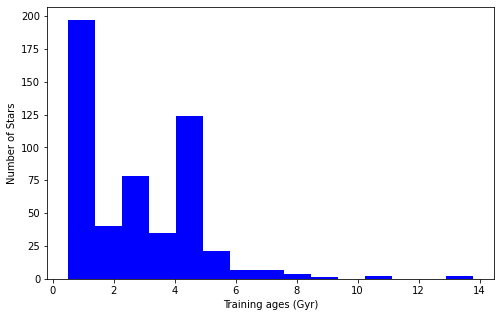

In [10]:
#Train ages
num_bins = 15

fig, ax1 = plt.subplots(figsize=(8,5))
n1, bins1, patches1 = ax1.hist(df_hist_B1['y_train'], num_bins, density=False, color='blue')

ax1.set_xlabel('Training ages (Gyr)')
ax1.set_ylabel('Number of Stars')

#plt.show()
plt.savefig('B1_training_hist.pdf')

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


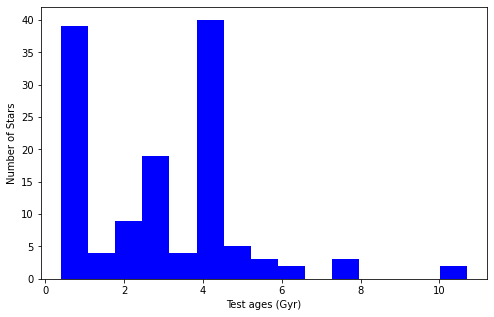

In [11]:
#Test ages
num_bins = 15

fig, ax2 = plt.subplots(figsize=(8,5))
n2, bins2, patches2 = ax2.hist(df_hist_B1['y_test'], num_bins, density=False, color='blue')

ax2.set_xlabel('Test ages (Gyr)')
ax2.set_ylabel('Number of Stars')

#plt.show()
plt.savefig('B1_test_hist.pdf')

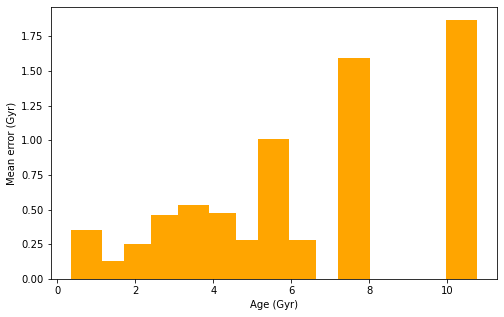

In [12]:
# Calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_model_B1[(df_model_B1['y_test'] >= bins2[i])
                                    & (df_model_B1['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_model_B1[(df_model_B1['y_test'] >= bins2[i])
                                    & (df_model_B1['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

fig, ax3 = plt.subplots(figsize=(8,5))

ax3.bar(aux,mean_error,color='orange')

ax3.set_xlabel('Age (Gyr)')
ax3.set_ylabel('Mean error (Gyr)')

plt.show()
#plt.savefig('B1_stack_test_error.pdf')

# Benchmark 2.1

- Models score when the shuffle param in train_test_split is False.
    - Train set: 70% of the entire dataset (To 3.03)
    - Test set: 30% of the entire dataset (From 3.04)
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [13]:
# Dataset as a dataframe.
df_mae_B2_G1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_results.csv', sep=",")
df_mae_B2_G1 = df_mae_B2_G1[['Name','MAE_test']]

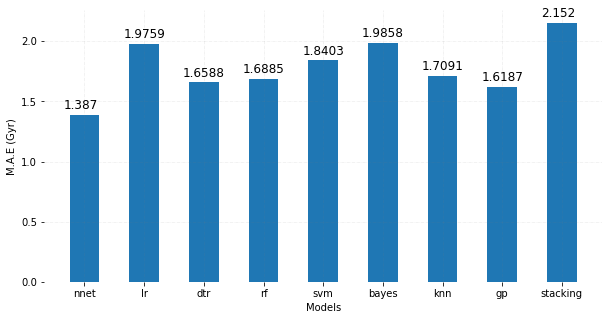

In [14]:
name = df_mae_B2_G1['Name'].tolist()
score = df_mae_B2_G1['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E (Gyr)')
ax.set_xlabel('Models')
  
# Show Plot 
#plt.savefig('B2_G1.pdf')
plt.show()

### Final test plots 

In [15]:
# Dataset as a dataframe.
df_model_B2_G1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_final_test_nnet.csv', sep=",")
df_model_B2_G1 = df_model_B2_G1[['y_test','y_pred','reg_error']]

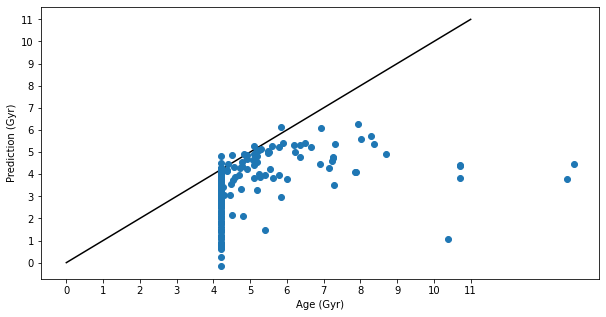

In [18]:
fig, ax = plt.subplots(figsize = (10,5))
#ax = plt.errorbar(df_model_B2_G1.y_test, df_model_B2_G1.y_pred, yerr=df_model_B2_G1.y_std, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.errorbar(df_model_B2_G1.y_test, df_model_B2_G1.y_pred, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.plot(range(0,12),range(0,12), color='black')

plt.yticks(np.arange(0, 12, 1))
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Age (Gyr)")
plt.ylabel("Prediction (Gyr)")
plt.show()
#plt.savefig('B1_G1_stacking_1_.pdf')

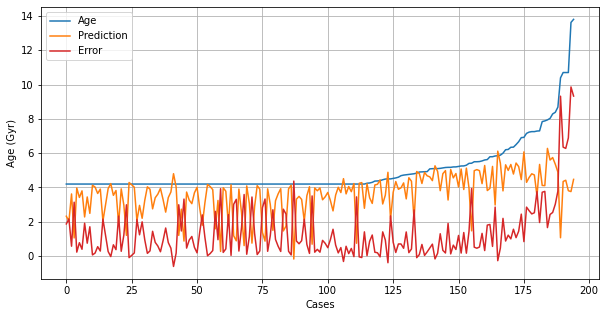

In [19]:
score = df_mae_B1.iloc[0,1]
#y_std = df1.iloc[10,2]
n = np.arange(df_model_B2_G1['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_model_B2_G1['y_test'], c='tab:blue', label='Age')
ax.plot(n, df_model_B2_G1['y_pred'], c='tab:orange', label='Prediction')
ax.plot(n, df_model_B2_G1['reg_error'], c='tab:red', label='Error')

#ax.fill_between(n, df_B1_1['y_pred']-y_std, df_B1_1['y_pred']+y_std,
#                color="pink", alpha=0.5, label="STD")
ax.set_xlabel('Cases')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [20]:
# Train and test datasets as one dataframe.
df_hist_B2_G1 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_data.csv', sep=",")
df_hist_B2_G1 = df_hist_B2_G1[['X_train','y_train','X_test','y_test']]

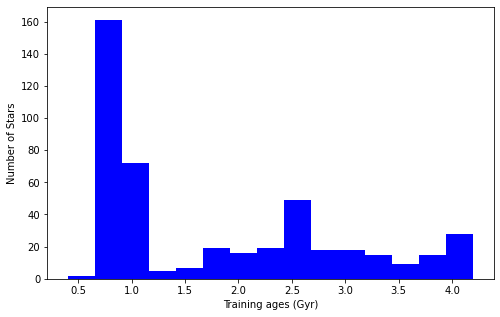

In [21]:
#Train ages
num_bins = 15

fig, ax1 = plt.subplots(figsize=(8,5))
n1, bins1, patches1 = ax1.hist(df_hist_B2_G1['y_train'], num_bins, density=False, color='blue')

ax1.set_xlabel('Training ages (Gyr)')
ax1.set_ylabel('Number of Stars')

plt.show()
#plt.savefig('B2_G1_training_hist.pdf')

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


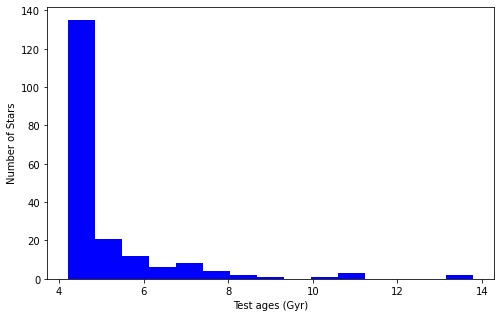

In [22]:
#Test ages
num_bins = 15

fig, ax2 = plt.subplots(figsize=(8,5))
n2, bins2, patches2 = ax2.hist(df_hist_B2_G1['y_test'], num_bins, density=False, color='blue')

ax2.set_xlabel('Test ages (Gyr)')
ax2.set_ylabel('Number of Stars')

plt.show()
#plt.savefig('B2_G1_test_hist.pdf')

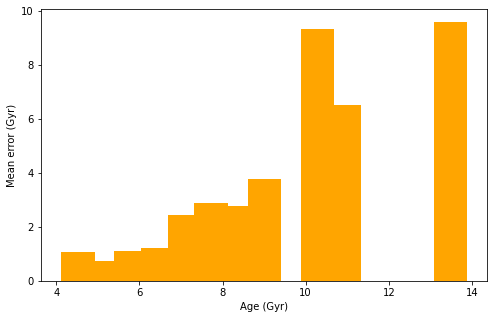

In [23]:
# Calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_model_B2_G1[(df_model_B2_G1['y_test'] >= bins2[i])
                                    & (df_model_B2_G1['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_model_B2_G1[(df_model_B2_G1['y_test'] >= bins2[i])
                                    & (df_model_B2_G1['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

fig, ax3 = plt.subplots(figsize=(8,5))

ax3.bar(aux,mean_error,color='orange')

ax3.set_xlabel('Age (Gyr)')
ax3.set_ylabel('Mean error (Gyr)')

plt.show()
#plt.savefig('B2_G1_stack_test_error.pdf')

# Benchmark 2.2

- Models score when the shuffle param in train_test_split is False.
    - Train set: 63% of the entire dataset (From 1.4)
    - Test set: 37% of the entire dataset (To 1.4)
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [24]:
# Dataset as a dataframe.
df_mae_B2_G2 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_results.csv', sep=",")
df_mae_B2_G2 = df_mae_B2_G2[['Name','MAE_test']]

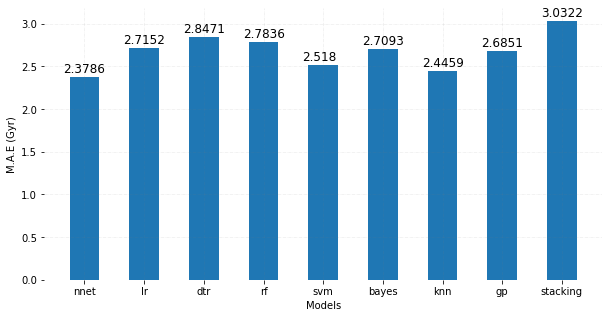

In [25]:
name = df_mae_B2_G2['Name'].tolist()
score = df_mae_B2_G2['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E (Gyr)')
ax.set_xlabel('Models')
  
# Show Plot 
#plt.savefig('B2_G2.pdf')
plt.show()

### Final test plots 

In [26]:
# Dataset as a dataframe.
df_model_B2_G2 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_final_test_nnet.csv', sep=",")
df_model_B2_G2 = df_model_B2_G2[['y_test','y_pred','reg_error']]

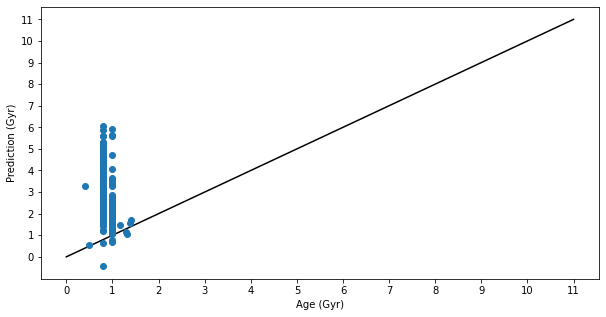

In [27]:
fig, ax = plt.subplots(figsize = (10,5))

#ax = plt.errorbar(df_model_B2_G2.y_test, df_model_B2_G2.y_pred, yerr=df_model_B2_G2.y_std, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.errorbar(df_model_B2_G2.y_test, df_model_B2_G2.y_pred, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.plot(range(0,12),range(0,12), color='black')

plt.yticks(np.arange(0, 12, 1))
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Age (Gyr)")
plt.ylabel("Prediction (Gyr)")
plt.show()
#plt.savefig('B2_G2_stacking_1_.pdf')

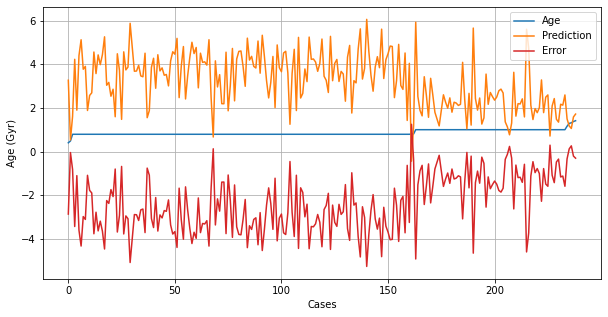

In [28]:
score = df_mae_B2_G2.iloc[0,1]
#y_std = df1.iloc[10,2]
n = np.arange(df_model_B2_G2['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_model_B2_G2['y_test'], c='tab:blue', label='Age')
ax.plot(n, df_model_B2_G2['y_pred'], c='tab:orange', label='Prediction')
ax.plot(n, df_model_B2_G2['reg_error'], c='tab:red', label='Error')

#ax.fill_between(n, df_B1_1['y_pred']-y_std, df_B1_1['y_pred']+y_std,
#                color="pink", alpha=0.5, label="STD")
ax.set_xlabel('Cases')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [32]:
# Train and test datasets as one dataframe.
df_B2_G2_hist = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_data.csv', sep=",")
df_B2_G2_hist = df_B2_G2_hist[['X_train','y_train','X_test','y_test']]

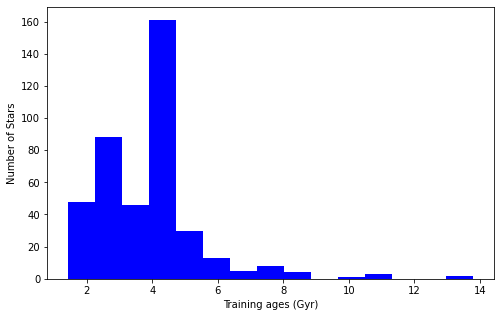

In [33]:
#Train ages
num_bins = 15

fig, ax1 = plt.subplots(figsize=(8,5))
n1, bins1, patches1 = ax1.hist(df_B2_G2_hist['y_train'], num_bins, density=False, color='blue')

ax1.set_xlabel('Training ages (Gyr)')
ax1.set_ylabel('Number of Stars')

plt.show()
#plt.savefig('B2_G2_training_hist.pdf')

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


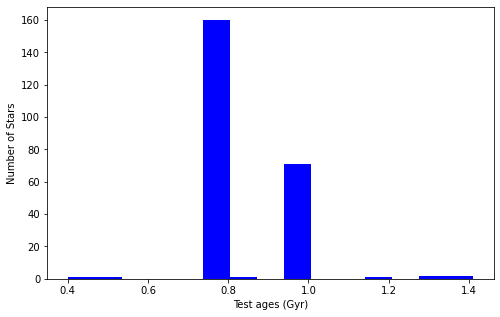

In [34]:
#Test ages
num_bins = 15

fig, ax2 = plt.subplots(figsize=(8,5))
n2, bins2, patches2 = ax2.hist(df_B2_G2_hist['y_test'], num_bins, density=False, color='blue')

ax2.set_xlabel('Test ages (Gyr)')
ax2.set_ylabel('Number of Stars')

plt.show()
#plt.savefig('B2_G2_test_hist.pdf')

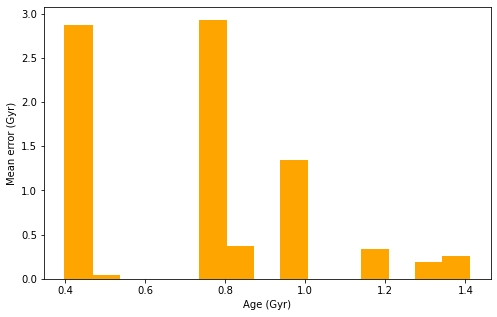

In [35]:
# Calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_model_B2_G2[(df_model_B2_G2['y_test'] >= bins2[i])
                                    & (df_model_B2_G2['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_model_B2_G2[(df_model_B2_G2['y_test'] >= bins2[i])
                                    & (df_model_B2_G2['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

fig, ax3 = plt.subplots(figsize=(8,5))

ax3.bar(aux,mean_error,color='orange', width=0.07)

ax3.set_xlabel('Age (Gyr)')
ax3.set_ylabel('Mean error (Gyr)')

plt.show()
#plt.savefig('B2_G2_stack_test_error.pdf')

# Benchmark 3



- Models score when the shuffle param in train_test_split is True.
    - Train set: 80% of the entire dataset
    - Test set: 100% of the new test set
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [36]:
# Dataset as a dataframe.
df_mae_B3 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B3/df_results_with_new_test.csv', sep=",")
df_mae_B3 = df_mae_B3[['Name','MAE_test']]

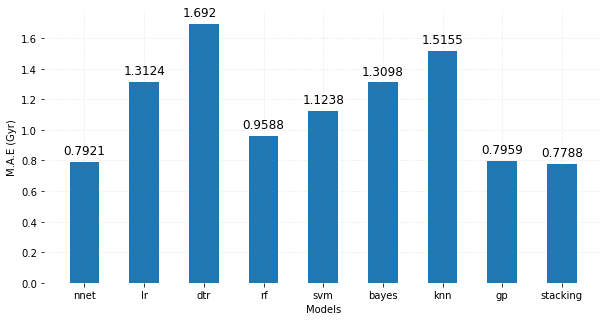

In [37]:
name = df_mae_B3['Name'].tolist()
score = df_mae_B3['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E (Gyr)')
ax.set_xlabel('Models')
  
plt.show() 
#plt.savefig('B3.pdf')

### Final test plots 

In [38]:
# Dataset as a dataframe.
df_model_B3 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B3/df_final_test_stacking.csv', sep=",")
df_model_B3 = df_model_B3[['y_test','y_pred','reg_error','y_std']]

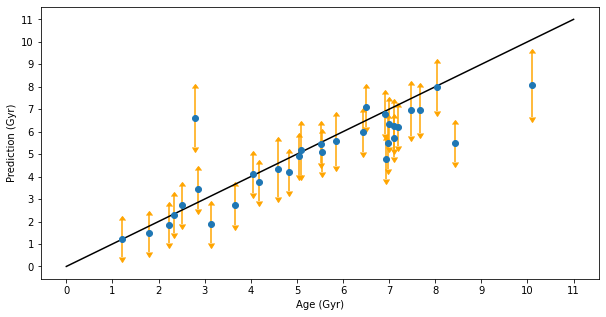

In [39]:
fig, ax = plt.subplots(figsize = (10,5))

ax = plt.errorbar(df_model_B3.y_test, df_model_B3.y_pred, yerr=df_model_B3.y_std, ecolor='orange', uplims=True, lolims=True, fmt='o')
ax = plt.plot(range(0,12),range(0,12), color='black')

plt.yticks(np.arange(0, 12, 1))
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Age (Gyr)")
plt.ylabel("Prediction (Gyr)")
plt.show()
#plt.savefig('B3_stacking_1_.pdf')

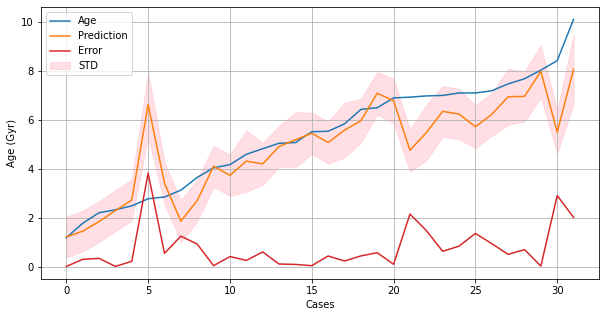

In [40]:
score = df_mae_B3.iloc[8,1]
y_std = df_model_B3.y_std
n = np.arange(df_model_B3['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_model_B3['y_test'], c='tab:blue', label='Age')
ax.plot(n, df_model_B3['y_pred'], c='tab:orange', label='Prediction')
ax.plot(n, abs(df_model_B3['reg_error']), c='tab:red', label='Error')

ax.fill_between(n, df_model_B3['y_pred']-y_std, df_model_B3['y_pred']+y_std,
                color="pink", alpha=0.5, label="STD")
ax.set_xlabel('Cases')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.grid(True)
plt.show()
#plt.savefig('B3_stacking_2.pdf')

### Ages histogram (train and test, without shuffle)

In [41]:
# Train and test datasets as one dataframe.
df_B3_hist = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B3/df_data_new_test.csv', sep=",")
df_B3_hist = df_B3_hist[['X_train','y_train','X_test','y_test']]

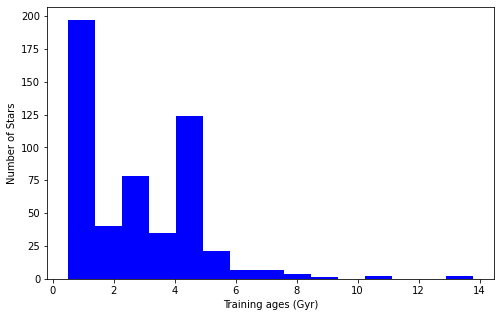

In [42]:
#Train ages
num_bins = 15

fig, ax1 = plt.subplots(figsize=(8,5))
n1, bins1, patches1 = ax1.hist(df_B3_hist['y_train'], num_bins, density=False, color='blue')

ax1.set_xlabel('Training ages (Gyr)')
ax1.set_ylabel('Number of Stars')

#plt.show()
plt.savefig('B1_training_hist.pdf')

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


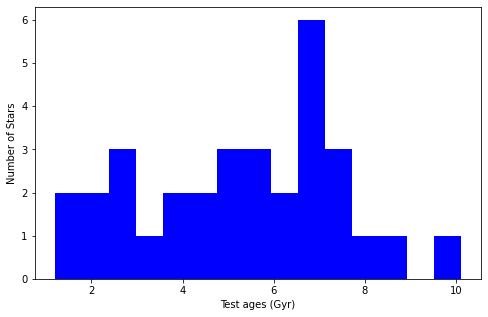

In [43]:
#Test ages
num_bins = 15

fig, ax2 = plt.subplots(figsize=(8,5))
n2, bins2, patches2 = ax2.hist(df_B3_hist['y_test'], num_bins, density=False, color='blue')

ax2.set_xlabel('Test ages (Gyr)')
ax2.set_ylabel('Number of Stars')

#plt.show()
plt.savefig('B1_test_hist.pdf')

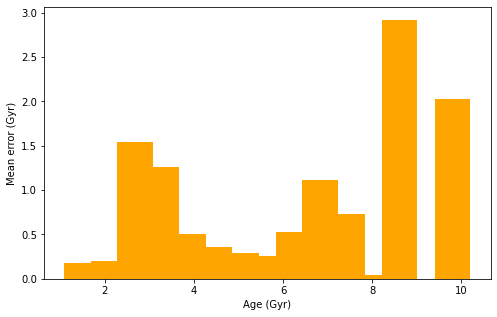

In [44]:
# Calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_model_B3[(df_model_B3['y_test'] >= bins2[i])
                                    & (df_model_B3['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_model_B3[(df_model_B3['y_test'] >= bins2[i])
                                    & (df_model_B3['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

fig, ax3 = plt.subplots(figsize=(8,5))

ax3.bar(aux,mean_error,color='orange')

ax3.set_xlabel('Age (Gyr)')
ax3.set_ylabel('Mean error (Gyr)')

#plt.show()
plt.savefig('B3_stack_test_error.pdf')